## Image Classification

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_x,train_y),(test_x,test_y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_x.shape

(60000, 28, 28)

In [4]:
train_y.shape

(60000,)

Label:5 


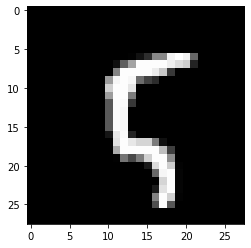

In [10]:
def look_img(num):
  plt.imshow(train_x[num],cmap='gray')
  print("Label:%s "%train_y[num])

look_img(100)

In [12]:
train_x =train_x/255.0
test_x = test_x/255.0

In [40]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
r = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6138 - accuracy: 0.8084 - val_loss: 0.1377 - val_accuracy: 0.9576
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1765 - accuracy: 0.9478 - val_loss: 0.1093 - val_accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1299 - accuracy: 0.9607 - val_loss: 0.1008 - val_accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1113 - accuracy: 0.9653 - val_loss: 0.0865 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0942 - accuracy: 0.9710 - val_loss: 0.0761 - val_accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0889 - accuracy: 0.9722 - val_loss: 0.0759 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0797 - accuracy: 0.9759 - val_loss: 0.0747 - val_accuracy:

In [43]:
model.evaluate(test_x,test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9809


[0.07000920176506042, 0.98089998960495]

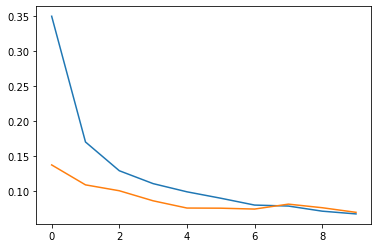

In [45]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

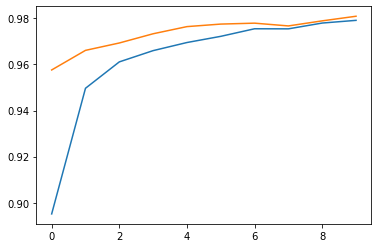

In [46]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

Confusion matrix, without normalization
[[ 971    0    1    1    0    0    2    1    4    0]
 [   0 1126    3    0    0    0    1    0    5    0]
 [   5    2 1008    2    3    0    1    5    6    0]
 [   1    0    3  989    0    4    0    6    5    2]
 [   2    0    0    0  951    0    7    2    1   19]
 [   1    0    0    5    1  877    2    0    4    2]
 [   4    3    0    1    4    7  937    0    2    0]
 [   1    2    6    1    1    0    0 1014    1    2]
 [   3    0    3    5    1    2    1    2  954    3]
 [   2    3    0    7    2    4    0    4    5  982]]


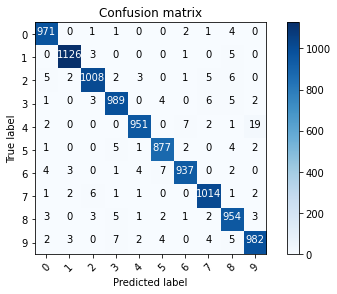

In [47]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(test_x).argmax(axis=1)
cm = confusion_matrix(test_y, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

In [1]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != test_y)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(test_x[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (test_y[i], p_test[i]));

NameError: ignored